#### **Instalando e Carregando as Bibliotecas**

In [1]:
#! pip install prophet

In [24]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

#### **Carregando os Dados Históricos**

In [25]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada:  PETR4.SA


In [4]:
dados.shape

(501, 7)

In [5]:
# A coluna Date - esta como indice precisa mudar 
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28 00:00:00-03:00,15.498864,15.508533,14.976756,15.276484,68610500,0.0,0.0
2022-03-29 00:00:00-03:00,15.532705,15.837266,15.431183,15.614887,93809000,0.0,0.0
2022-03-30 00:00:00-03:00,15.711575,15.948458,15.653563,15.948458,69648400,0.0,0.0
2022-03-31 00:00:00-03:00,15.745414,16.228847,15.711574,16.170835,94269500,0.0,0.0
2022-04-01 00:00:00-03:00,16.219178,16.335203,15.909782,15.958124,72545400,0.0,0.0


#### **Gráfico da Variação do Período Histórico**

<Axes: xlabel='Date'>

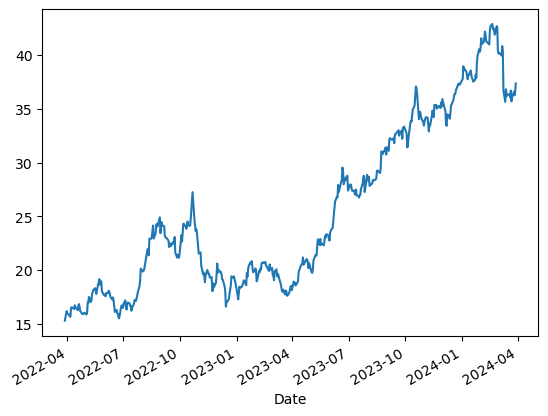

In [26]:
dados.Close.plot()

#### **Preparando os Dados de Treinamento**

In [32]:
# Mudar o indice da tabela, tirar Date e colocar o indice padrão
treinamento = dados.reset_index()

In [33]:
# Retirando o timezone (fuso horário) da coluna data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [34]:
# Selecionando as colunas de data e valor de fechamento
treinamento = treinamento[["Date","Close"]]

In [35]:
# Renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ["ds", "y"]

#### **Criação do Modelo de Machine Learning**

In [15]:
modelo = Prophet()

#### **Treinamento do Modelo Machine Learning**

In [16]:
modelo.fit(treinamento)

14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:18 - cmdstanpy - INFO - Chain [1] done processing


#### Gerando Datas Futuras

In [39]:
# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

#### Gerando as Previsões

In [40]:
previsoes = modelo.predict(periodo)
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-28,19.109720,14.123085,16.690514,19.109720,19.109720,-3.681190,-3.681190,-3.681190,0.749242,0.749242,0.749242,-4.430432,-4.430432,-4.430432,0.0,0.0,0.0,15.428530
1,2022-03-29,19.101703,14.220216,16.703831,19.101703,19.101703,-3.615012,-3.615012,-3.615012,0.741364,0.741364,0.741364,-4.356376,-4.356376,-4.356376,0.0,0.0,0.0,15.486691
2,2022-03-30,19.093685,14.386247,16.758186,19.093685,19.093685,-3.498920,-3.498920,-3.498920,0.770459,0.770459,0.770459,-4.269378,-4.269378,-4.269378,0.0,0.0,0.0,15.594766
3,2022-03-31,19.085668,14.521749,16.917177,19.085668,19.085668,-3.350821,-3.350821,-3.350821,0.821066,0.821066,0.821066,-4.171887,-4.171887,-4.171887,0.0,0.0,0.0,15.734847
4,2022-04-01,19.077651,14.544941,17.005323,19.077651,19.077651,-3.284588,-3.284588,-3.284588,0.781873,0.781873,0.781873,-4.066461,-4.066461,-4.066461,0.0,0.0,0.0,15.793063


#### Visualizando as Previsões

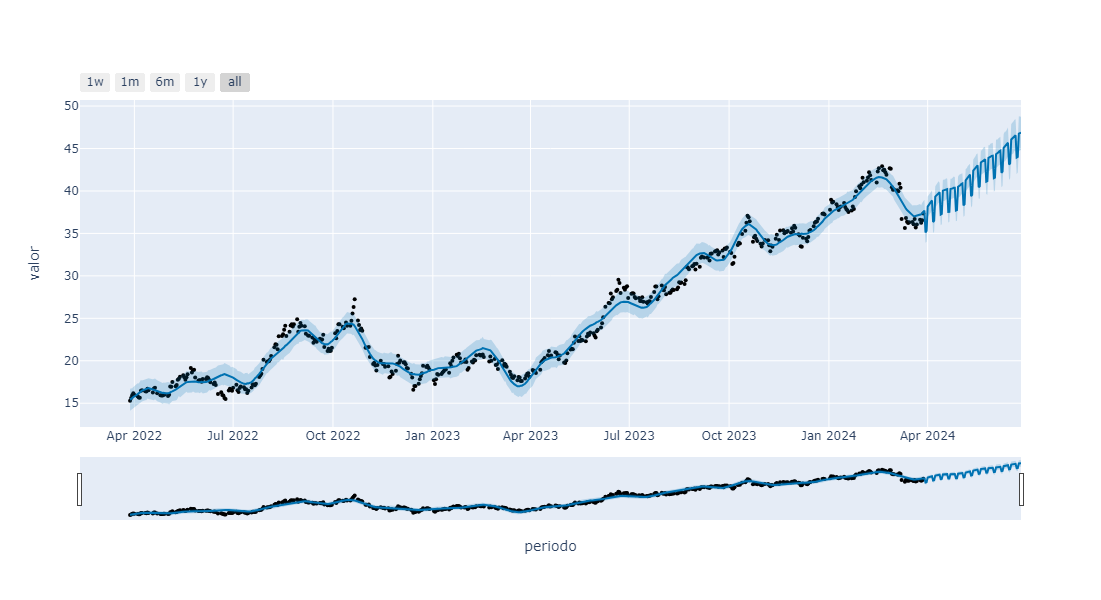

In [42]:
plot_plotly(modelo, previsoes, xlabel = "periodo", ylabel = "valor")